<a href="https://colab.research.google.com/github/nishi1612/Modelling-and-Simulation/blob/master/Market_Spread_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas import read_html
from pylab import *
import sklearn.metrics


**Case 1 : External Influence Model**

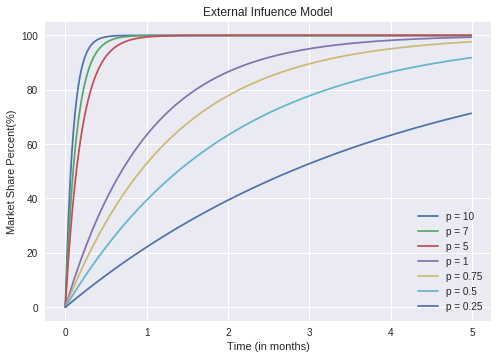

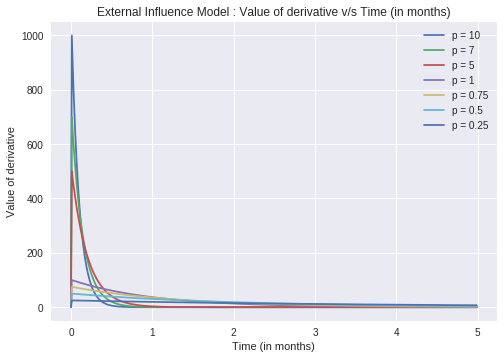

In [0]:
start_time = 0
end_time = 5
dt = 0.01

t = np.arange(start_time,end_time,dt)

def model_derivative(p,c,n):
   return p*(c-n)

n = int((end_time - start_time) / dt )
derivative = []

c = 100

## What we want to do to increase our spread and to decrease our spread
## Examine for what values is the external influence showing maximum spread

p_values = [10,7,5,1,0.75,0.5,0.25]

for p in p_values:
  N = np.zeros(n)
  N[0] = 0
  der = []
  der.append(0)

  for i in range(1,len(N)):
    N[i] = N[i-1] + (dt * model_derivative(p,c,N[i-1]))
    #P[i] = (N[i] - N[i-1])*100
    der.append(model_derivative(p,c,N[i-1]))
  derivative.append(der)
  string = 'p = ' + str(p)
  
  plt.plot(t,N,label=string)
  plt.ylabel('Market Share Percent(%)')
  plt.xlabel('Time (in months)')

plt.title('External Infuence Model')
plt.legend()
plt.show()

for i in range(len(p_values)):
  string = 'p = ' + str(p_values[i])
  plt.plot(t,derivative[i],label = string)

plt.xlabel('Time (in months)')
plt.ylabel('Value of derivative')
plt.title('External Influence Model : Value of derivative v/s Time (in months)')
plt.legend()
plt.show()

**Case 2 : Internal Influence Model**

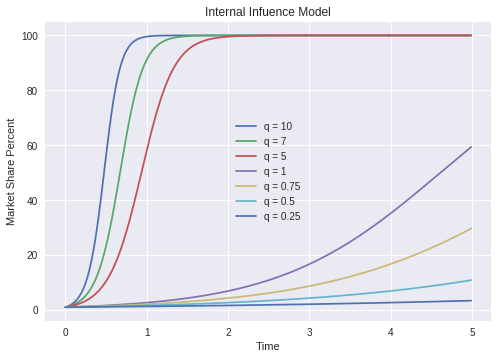

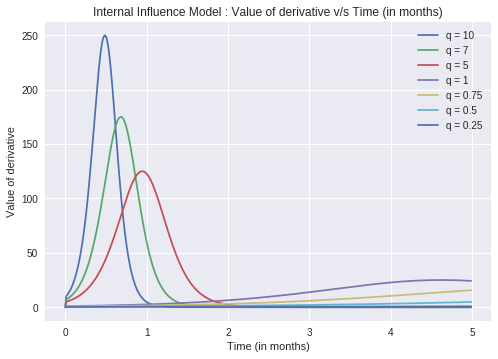

In [0]:
start_time = 0
end_time = 5
dt = 0.01

t = np.arange(start_time,end_time,dt)

def model_derivative(q,c,n):
   return q*n*(c-n)/c

n = int((end_time - start_time) / dt )
N = np.zeros(n)
N[0] = 1
c = 100

q_values = [10,7,5,1,0.75,0.5,0.25]
derivative = []

for q in q_values:

  der = []
  der.append(0)
  for i in range(1,len(N)):
    N[i] = N[i-1] + (dt * model_derivative(q,c,N[i-1]))
    der.append(model_derivative(q,c,N[i-1]))
  
  derivative.append(der)
  string = 'q = ' + str(q)
  plt.plot(t,N,label=string)
  plt.ylabel('Market Share Percent')
  plt.xlabel('Time')
  
plt.title('Internal Infuence Model')
plt.legend(loc='best')

plt.show()

for i in range(len(q_values)):
  string = 'q = ' + str(q_values[i])
  plt.plot(t,derivative[i],label = string)

plt.xlabel('Time (in months)')
plt.ylabel('Value of derivative')
plt.title('Internal Influence Model : Value of derivative v/s Time (in months)')
plt.legend()
plt.show()

**Case 3 : Mixed Influence Model**

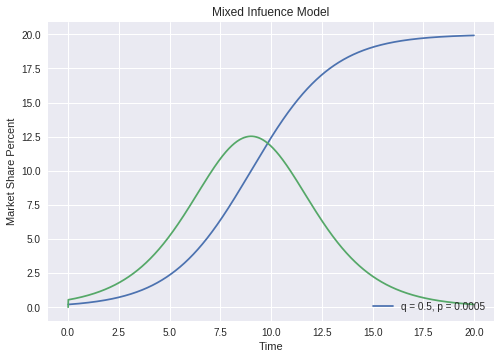

In [0]:
start_time = 0
end_time = 20
dt = 0.01

t = np.arange(start_time,end_time,dt)

def model_derivative(p,q,c,n):
   return (p + (q*n/c))*(c-n)

n = int((end_time - start_time) / dt )
N = np.zeros(n)
N[0] = 1
c = 100

q_values = [0.5]
p_values = [0.0005]

derivative = []

P = np.zeros(n)
P[0] = 0
 
for p in p_values:
  for q in q_values:
    der = []
    der.append(0)
    for i in range(1,len(N)):
      N[i] = N[i-1] + (dt * model_derivative(p,q,c,N[i-1]))
      P[i] = (N[i] - N[i-1]) * 100
                 
    string = 'q = ' + str(q) + ', p = ' + str(p)
    plt.plot(t,N/5,label=string)
    
    plt.plot(t,P)
    
    plt.ylabel('Market Share Percent')
    plt.xlabel('Time')
  
plt.title('Mixed Infuence Model')
plt.legend(loc='lower right')
plt.show()

**Birth Death Rate**

In [0]:
tables = read_html(
            'https://en.wikipedia.org/wiki/World_population_estimates',
            header=0, index_col=0)

table2 = tables[2] 
table2.columns = ['UScensus', 'prb', 'undesa', 'maddison', 'hyde', 'tanton', 'biraben', 'mj','thomlinson', 'durand', 'clark']

census = table2.UScensus 
actPop = census.values[1:len(census)-1] 
actTime = census.index[1:len(census)-1] 

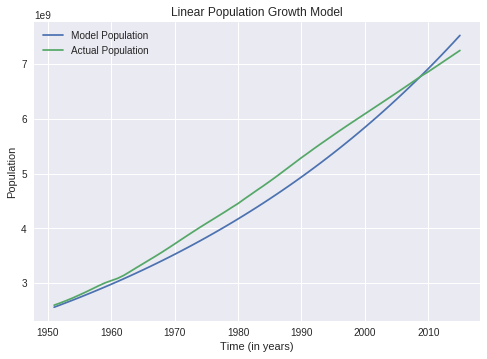

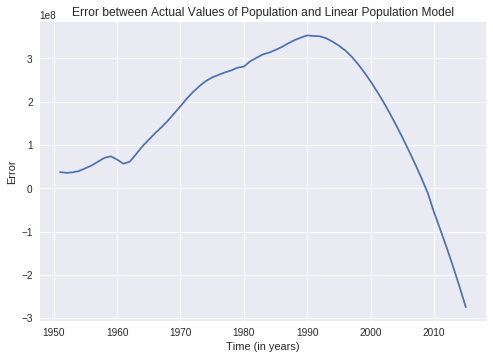

194462086.4864105
223568471.885876


In [0]:
start_time = 0
end_time = 65
dt = 1

t = np.arange(start_time,end_time,dt)

def model_derivative(birth_rate,death_rate,n):
   return (birth_rate - death_rate) * n

n = int((end_time - start_time) / dt )
N1 = np.zeros(n)
N1[0] = 2557628654 	

b = 0.027
d = 0.01

for i in range(1,len(N1)):
  N1[i] = N1[i-1] + (dt * model_derivative(b,d,N1[i-1]))

plt.plot(actTime,N1,label = 'Model Population')
plt.plot(actTime,actPop,label = 'Actual Population')
plt.ylabel('Population')
plt.xlabel('Time (in years)')
plt.legend()
plt.title('Linear Population Growth Model')
plt.show()

plt.plot(actTime,actPop - N1)
plt.ylabel('Error')
plt.xlabel('Time (in years)')
plt.title('Error between Actual Values of Population and Linear Population Model')

plt.show()

arr = abs(actPop - N1)

print(sum(arr)/len(arr))
arr = [i*i for i in arr]

print(math.sqrt(sum(arr)/len(arr)))

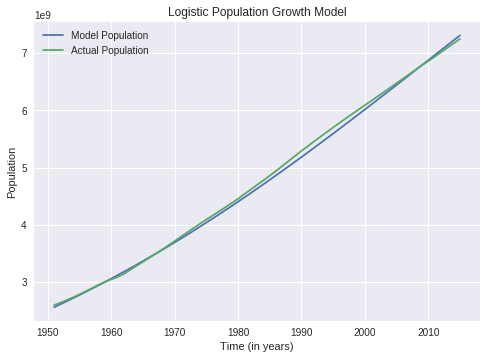

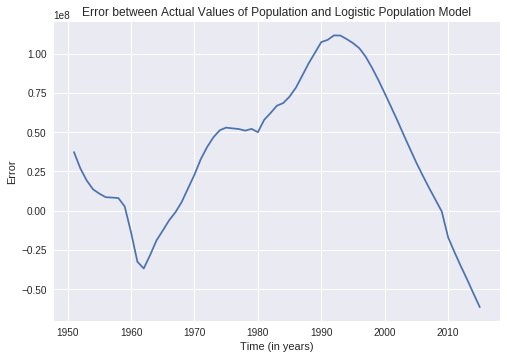

48063195.303421475
58418403.12533427


In [0]:
start_time = 0
end_time = 65
dt = 1

t = np.arange(start_time,end_time,dt)

def model_derivative(r,gamma,x):
   return r*x*(1-(x*gamma/r))

n = int((end_time - start_time) / dt )
N2 = np.zeros(n)
N2[0] = 2557628654 	

r = 0.025
gamma = 18e-13

for i in range(1,len(N2)):
  N2[i] = N2[i-1] + (dt * model_derivative(r,gamma,N2[i-1]))

plt.plot(actTime,N2,label = 'Model Population')
plt.plot(actTime,actPop,label = 'Actual Population')
plt.ylabel('Population')
plt.xlabel('Time (in years)')
plt.legend()
plt.title('Logistic Population Growth Model')

plt.show()

plt.plot(actTime,actPop - N2)
plt.ylabel('Error')
plt.xlabel('Time (in years)')
plt.title('Error between Actual Values of Population and Logistic Population Model')

plt.show()

arr = abs(actPop - N2)

print(sum(arr)/len(arr))
arr = [i*i for i in arr]

print(math.sqrt(sum(arr)/len(arr)))

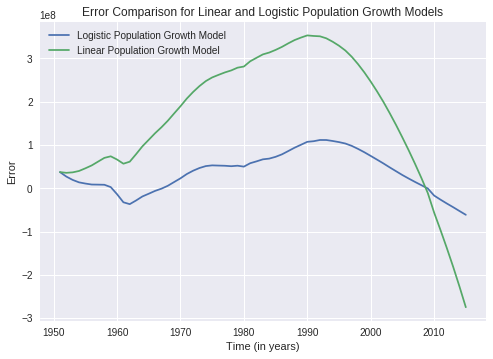

In [0]:
plt.plot(actTime,actPop - N2,label='Logistic Population Growth Model')
plt.plot(actTime,actPop - N1,label='Linear Population Growth Model')
plt.xlabel('Time (in years)')
plt.ylabel('Error')
plt.title('Error Comparison for Linear and Logistic Population Growth Models')
plt.legend()
plt.show()